# Question1: 線形計画法 (1)

=============================================================================================

問題）変数 x と y が次の条件を満たすとき、  
(1) x+y が最大となる x と y の浮動小数点と整数組み合わせを求めよ。  
(2) x+y が最小となる x と y の浮動小数点と整数組み合わせを求めよ。  

＜条件＞  
4 x + y <= 12  
0.5 x + y <=4  

数理最適化のライブラリー pulp を用いて解きなさい。

=============================================================================================

(1) ライブラリー pulp を用いて、浮動小数点での目的関数 (x + y) が最大になるようにといてみましょう。

In [2]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 5.2 MB/s 


In [3]:
from pulp import * 

In [4]:
# 問題の定義
problem = LpProblem('simple_problem', LpMaximize)

# 変数の定義
x = LpVariable('x')
y = LpVariable('y')

# 目的関数
problem += x + y

# 制約条件の定義
problem += -4*x + 12 >= y
problem += -1/2*x+4 >= y

In [5]:
print(problem)

simple_problem:
MAXIMIZE
1*x + 1*y + 0
SUBJECT TO
_C1: - 4 x - y >= -12

_C2: - 0.5 x - y >= -4

VARIABLES
x free Continuous
y free Continuous



In [6]:
# 解く
status = problem.solve()
print(LpStatus[status])

Optimal


解けた場合は「Optimal」と出力されます。

In [7]:
# 結果表示
print("x:",x.value())
print("y:",y.value())

x: 2.2857143
y: 2.8571429


次に整数解を解きます。

In [8]:
# 問題の定義
problem = LpProblem('simple_problem', LpMaximize)

# 変数の定義
x = LpVariable('x', cat = "Integer") # 変数を整数で定義
y = LpVariable('y', cat = "Integer")

# 目的関数
problem += x + y

# 制約条件の定義
problem += -4*x + 12 >= y
problem += -1/2*x+4 >= y

In [9]:
print(problem)

simple_problem:
MAXIMIZE
1*x + 1*y + 0
SUBJECT TO
_C1: - 4 x - y >= -12

_C2: - 0.5 x - y >= -4

VARIABLES
x free Integer
y free Integer



In [10]:
# 解く
status = problem.solve()
print(LpStatus[status])

Optimal


In [12]:
# 結果表示
print("x:",x.value())
print("y:",y.value())

x: 2.0
y: 3.0


=============================================================================================

(2) 次に目的関数が最小になる場合を解いてみましょう。

In [13]:
# 問題の定義
problem = LpProblem('simple_problem', LpMinimize)

# 変数の定義
x = LpVariable('x')
y = LpVariable('y')

# 目的関数
problem += x + y

# 制約条件の定義
problem += -4*x + 12 >= y
problem += -1/2*x+4 >= y

In [14]:
print(problem)

simple_problem:
MINIMIZE
1*x + 1*y + 0
SUBJECT TO
_C1: - 4 x - y >= -12

_C2: - 0.5 x - y >= -4

VARIABLES
x free Continuous
y free Continuous



In [15]:
# 解く
status = problem.solve()
print(LpStatus[status])

Unbounded


最適解がないときには「Unbounted」と出力されます。

In [ ]:
# 結果表示
print("x:",x.value())
print("y:",y.value())

解がない場合は 0.0 と出力されます。

=============================================================================================

# 解説

制約条件と目的変数を表すグラフを描いてみましょう。

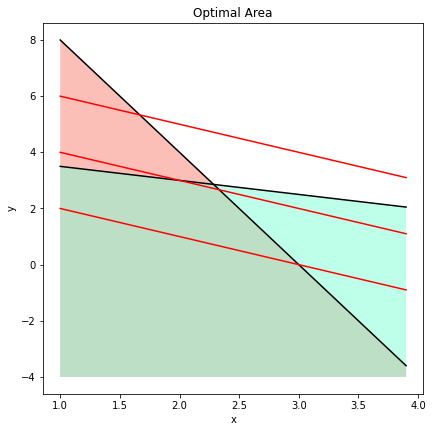

In [17]:
# http://www.sakutyuu.com/technology/?p=1935
# https://cranethree.hatenablog.com/entry/2015/07/25/204608
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

# 描画範囲の指定
x = np.arange(1, 4, 0.1)

# 計算式
y1 = -4*x + 12
y2 = -0.5*x + 4
y3 = -4

y4 = -x + 7
y5 = -x + 5
y6 = -x + 3


fig = plt.figure(figsize=(15, 15), facecolor="w")
ax = fig.add_subplot(2, 2, 1, title="Optimal Area")

# 横軸の変数。縦軸の変数。
ax.plot(x, y1, color="black")
ax.plot(x, y2, color="black")
ax.plot(x, y4, color="red")
ax.plot(x, y5, color="red")
ax.plot(x, y6, color="red")

ax.fill_between(x, y1, y3, where=y1>y3, facecolor='salmon', alpha=0.5)
ax.fill_between(x, y2, y3, where=y2>y3, facecolor='aquamarine',alpha=0.5)
 
# ラベルの描画
plt.xlabel("x")
plt.ylabel("y")
 
# 描画実行
plt.show()

２つの制約条件を満たすの領域（左したの緑色の領域）と、目的関数の x + y = a の aの値を 3, 5, 7 と変化した直線を赤線で描いてみました。  
一番上の x + y = 7 では目的関数の赤線が緑の領域を通らないので、x + y は 7 よりも小さいことがわかります。  
その下の２つの赤線は緑の領域を通っているので、両方共制約条件は満たしていますね。  
その中で目的関数が最大値を満たすのは、３本の線のなかでは真ん中の x + y = 5 となり、実際にこれが x, y が整数のときの解になっています。  
最小値は、x + y = 3 以外にも緑色の領域にいくらでも線を引けるので解がないということになります。  
最小値問題に x, y ともに正の整数という制約条件を付け加えたらどうなるでしょうか？

In [19]:
# 問題の定義
problem = LpProblem('simple_problem', LpMinimize)

# 変数の定義
x = LpVariable('x', cat = "Integer") # 変数を整数で定義
y = LpVariable('y', cat = "Integer")

# 目的関数
problem += x + y

# 制約条件の定義
problem += -4*x + 12 >= y
problem += -1/2*x+4 >= y
problem += x >= 1 # xは正という制約条件を追加
problem += y >=1 # yは正という制約条件を追加

In [22]:
# 解く
status = problem.solve()
print(LpStatus[status])

Optimal


In [20]:
# 結果表示
print("x:",x.value())
print("y:",y.value())

x: 1.0
y: 1.0


今回は解が出ました！